In [247]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import tensorflow as tf

In [135]:
data = pd.read_csv('ex1data1.txt', header=None)

X shape:(97, 2)
Y shape:(97, 1)


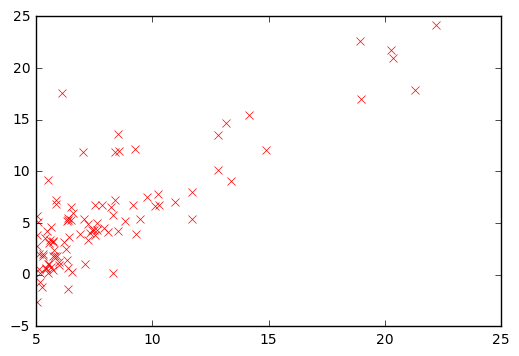

In [185]:
data_X = data[0]
data_Y = data[1]
data_M = data_X.shape[0]
plt.plot(data[0], data[1], 'rx')


# X0 needs to be appended to data_X
data_X = pd.concat( [
    pd.Series(np.ones(data_M)),
    data_X
    ],  axis = 1)
data_X.columns = [0, 1]
print("X shape:{}".format(data_X.shape))

# Cleanup data_Y
data_Y = data_Y.reshape(data_Y.shape[0], 1)
print("Y shape:{}".format(data_Y.shape))

final cost:4.483411454154189
final theta:-3.6302914233300645, 1.1663623487207446


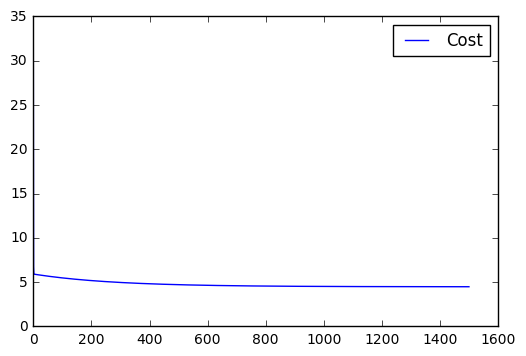

In [243]:
# Tweak params
learning_rate = 0.01
iterations = 1500

# Gradient Descent Code
tf.reset_default_graph() #reset all placeholder's if we are running this cell multiple times

x = tf.placeholder(tf.float64)
y = tf.placeholder(tf.float64) 
m = tf.constant(data_M , dtype=tf.float64)

# h(x) = 𝜃'x
theta = tf.Variable(tf.zeros([2, 1], dtype=tf.float64), dtype=tf.float64)
hx = tf.matmul(x, theta)

J = tf.div(tf.reduce_mean(tf.square(tf.sub(hx, y))),2.0)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(J)

with tf.Session() as sess:    
    J_hist = np.zeros(iterations)
    sess.run(tf.initialize_all_variables())
    
    for i in range(iterations):
        _, J_hist[i] = sess.run([optimizer, J], feed_dict={x: data_X, y : data_Y})
    
    finalTheta = sess.run(theta)

print("final cost:{}".format(c))
print("final theta:{}, {}".format(finalTheta[0][0], finalTheta[1][0]))

plt.plot(J_hist, label='Cost')
plt.legend()

(97, 2)
(2, 1)


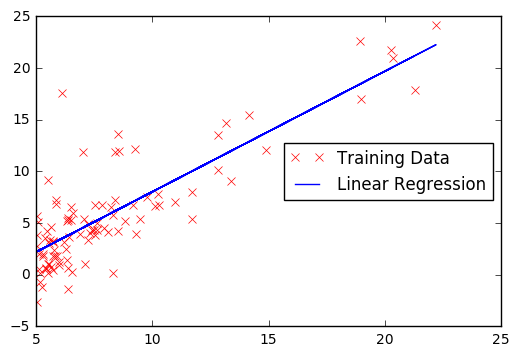

In [246]:
print(data_X.shape)
print(finalTheta.shape)

#np.mul(data_X, finalTheta)
plt.plot(data[0], data[1], 'rx', label='Training Data')
plt.plot(data_X[1], np.matmul(data_X.values , finalTheta), '-',label='Linear Regression')
plt.legend(loc='right')